In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Import the visualization library
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# The dataset for this study is the famous titanic dataset

In [3]:
df = pd.read_csv('titanic_train.csv')
df.sample(n=7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S


In [4]:
# Check

df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# loop through each column to find if null value(s) exist

files = ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for i in files:
    print(i, df[i].isna().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


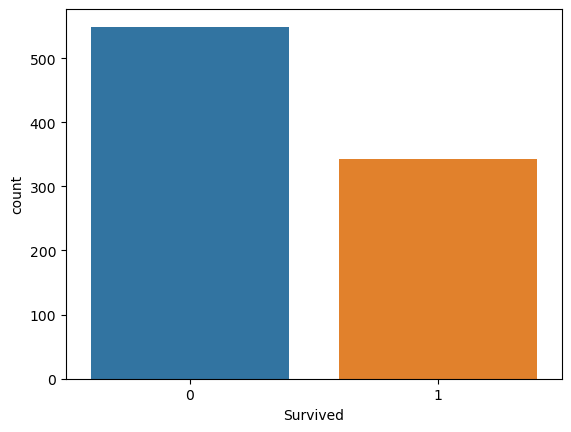

In [6]:
# Do a visualization to compare the number of those survived nd those died

sns.countplot(x = 'Survived', data = df);

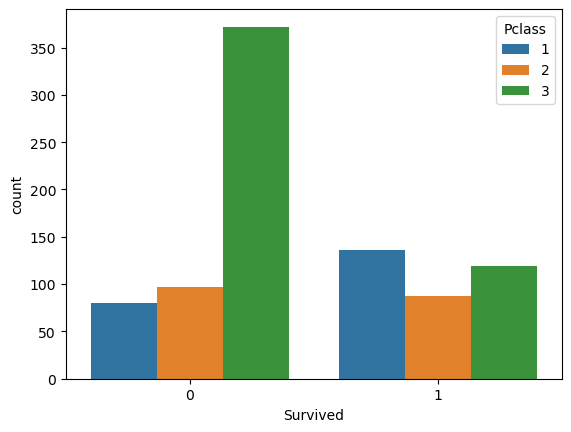

In [7]:
# Hue your data with 'pclass' so as to compare the survival rate by 'Pclass'

sns.countplot(x = 'Survived', data = df, hue = 'Pclass', orient = 'v');

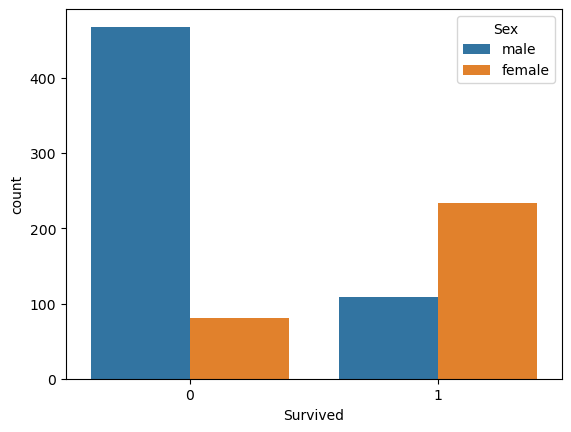

In [8]:
# Show survival rate by sex

sns.countplot(x = 'Survived', data = df, hue = 'Sex', orient = 'v');

In [ ]:
# DATA IMPUTATION

In [9]:
# Fill na value(s) with the modal value for the column 'Embarked'

df['Embarked'].value_counts()
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'].isna().sum()

0

In [10]:
# Using groupby, find the average Age of each unique class

df.groupby(by = 'Pclass')['Age'].mean().astype('int')

Pclass
1    38
2    29
3    25
Name: Age, dtype: int32

In [11]:
# Define a formula that will help us find and fill the null values 

def avr_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else : 
            return Age

In [12]:
# Apply

df["Age"] = df[['Age', 'Pclass']].apply(avr_age, axis = 1)
df['Age'].isnull().sum()

0

In [13]:
# Drop irrelvant column(s)

df.drop(columns = ['Cabin', 'PassengerId', 'Name'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,24.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [14]:
# Confirm if there is still null values

files = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Embarked']
for i in files:
    print(i, df[i].isna().sum())

Survived 0
Pclass 0
Sex 0
Age 0
SibSp 0
Parch 0
Ticket 0
Fare 0
Embarked 0


In [ ]:
# FEATURE ENGINEERING

In [15]:
df_1 = pd.get_dummies( data = df, columns = ['Sex'], drop_first = True)

In [16]:
df_2 = pd.get_dummies(data = df_1, columns = ['Embarked'], drop_first = False)

In [17]:
df_3 = pd.get_dummies(data = df_2, columns = ['Pclass'], drop_first = False)

In [18]:
df_3

,Survived,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,113803,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,373450,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,211536,13.0000,1,0,0,1,0,1,0
887,1,19.0,0,0,112053,30.0000,0,0,0,1,1,0,0
888,0,24.0,1,2,W./C. 6607,23.4500,0,0,0,1,0,0,1
889,1,26.0,0,0,111369,30.0000,1,1,0,0,1,0,0


In [19]:
df_3.drop(columns = ['Ticket'], axis = 1, inplace = True)

In [20]:
df_3.sample(3)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
327,1,36.0,0,0,13.000,0,0,0,1,0,1,0
16,0,2.0,4,1,29.125,1,0,1,0,0,0,1
344,0,36.0,0,0,13.000,1,0,0,1,0,1,0


In [21]:
# Logistic Regression

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df_3.iloc[:, 1:11]
y = df.loc[:, 'Survived'] 

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(623, 10)
(268, 10)
(623,)
(268,)


In [24]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter =  1000)

In [25]:
logit.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
predict = logit.predict(x_test)

In [27]:
# A tabular visual of the Actual and Predicted values. This shows how far our predicted value is from the Actual value

compare = pd.DataFrame({'Actual': y_test, 'Predict' : predict})
compare.sample(4)

,Actual,Predict
168,0,0
478,0,0
139,0,1
813,0,0


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       157
           1       0.81      0.71      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [29]:
Validation = (confusion_matrix(y_test, predict))
Validation

array([[138,  19],
       [ 32,  79]], dtype=int64)

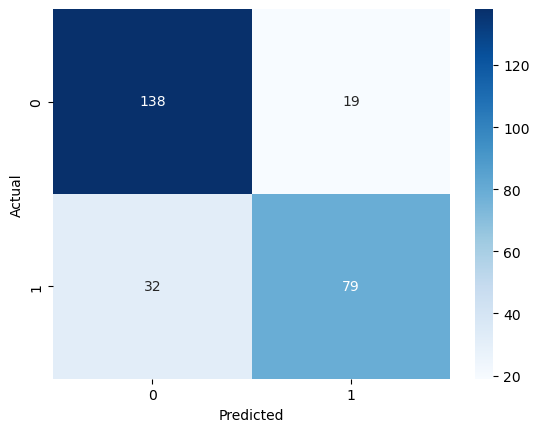

In [30]:
#Plot a heatmap showing the confusion matrix

ax = sns.heatmap(data = Validation, cmap = 'Blues', fmt = 'd', annot = True)

# Display the plot

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show();

In [32]:
import statsmodels.formula.api as smf

In [34]:
formula = 'Survived ~ Age + SibSp + Parch + Fare + Sex_male + Embarked_C + Embarked_Q + Embarked_S + Pclass_1 + Pclass_2 + Pclass_3'

model = smf.logit(formula = formula, data = df_3).fit()

Optimization terminated successfully.
         Current function value: 0.438670
         Iterations 22


In [35]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Wed, 04 Oct 2023   Pseudo R-squ.:                  0.3412
Time:                        00:47:39   Log-Likelihood:                -390.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.206e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8029   4.27e+06   4.22e-07      1.000   -8.37e+06    8.37e+06
Age           -0.0425      0.008     -5.162      0.000      -0.059      -0.026
SibSp         -0.3386      0.110     -3.069      0.0

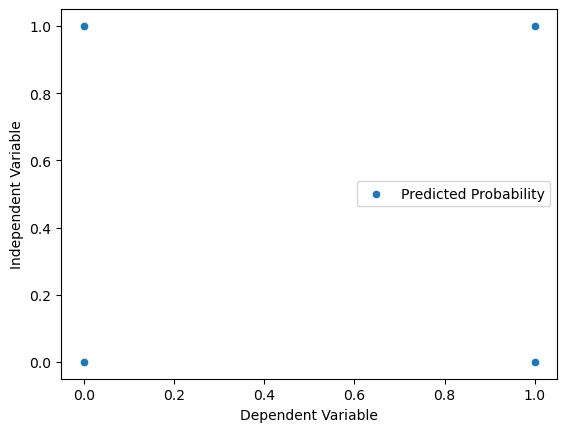

In [38]:
sns.scatterplot(data = df_3, x = 'Sex_male', y = 'Survived',  label = 'Predicted Probability')
plt.xlabel('Dependent Variable')
plt.ylabel('Independent Variable')
plt.legend()
plt.show();